# Seaborn ( Data visualization )
__Reference: Pandas for Everyone - chapter#3 __

We already learn (a tiny bit) about Matplotlib. It is a powerful library. Seaborn is another libaray build on top of Matplotlib. Seaborn provides many features that make it a bit easier for us to make plots. We can visit the page to get for information. https://seaborn.pydata.org/

![Seaborn Page](assets/sns_page.png)

Seaborn can generate many useful plots. Let's visit the gallery. https://seaborn.pydata.org/examples/index.html

![Seaborn gallery](assets/sns_gallery.png)

## Installation
Install seaborn using the same process have did with other libraries.

![Install seaborn](assets/install.png)

After we installed it, we need to import seaborn first.

In [39]:
import seaborn as sns

Seaborn comes with datasets that we can play with. Let's load and play with a dataset called **anscombe**.

In [40]:
anscombe = sns.load_dataset("anscombe")
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [41]:
type(anscombe) # the type is.....

pandas.core.frame.DataFrame

In [42]:
anscombe.shape # the shape is....

(44, 3)

There are 4 groups. Each group has 11 data points. There are 3 columns( dataset, x, y).



Let's also import **the usual**.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Selecting rows from a dataframe
There are 4 datasets inside anscombe. We want to extract only certain rows out.

First, let's manually select only some rows out.

__Refer back to **subsetting rows**__

In [44]:
my_df = anscombe.loc[ [0,14,27,33,40]]

my_df2 = my_df.copy()  # Copy so that we can play with it
my_df3 = my_df.copy()  # Copy so that we can play with it
my_df2.head()

,dataset,x,y
0,I,10.0,8.04
14,II,9.0,8.77
27,III,14.0,8.84
33,IV,8.0,6.58
40,IV,19.0,12.50


Reset the index as if the data is so short like this in the first place.
Notice that the old indexes now become a column.

In [45]:
my_df2.reset_index(inplace = True)
my_df2

,index,dataset,x,y
0,0,I,10.0,8.04
1,14,II,9.0,8.77
2,27,III,14.0,8.84
3,33,IV,8.0,6.58
4,40,IV,19.0,12.50


If we don't want the old index to become a column, ...

In [46]:
my_df3.reset_index(drop = True, inplace = True)
my_df3

,dataset,x,y
0,I,10.0,8.04
1,II,9.0,8.77
2,III,14.0,8.84
3,IV,8.0,6.58
4,IV,19.0,12.50


## Selecting by passing a list of booleans
We can select rows by passing a list of booleans to a dataframe. One way to think about it is like we have a checkbox in front of each row. If it is True, we choose it. Otherwise (False), we don't choose that row.
![table](assets/df_select.png)



In [47]:
# Let's select the first,second, and the last row
selected = [True,True,False,False,True]
my_df3[ selected ]

,dataset,x,y
0,I,10.0,8.04
1,II,9.0,8.77
4,IV,19.0,12.50


### Notice that we can use True or False to select the rows !!

In reality, there will be so many rows. Hence, we won't be typing True/False to select the rows. We would create conditions that returns True/False instead.

In [48]:
selected = my_df3['x'] > 10
selected # a series of boolean values

0    False
1    False
2     True
3    False
4     True
Name: x, dtype: bool

In [49]:
selected = (my_df3['dataset'] == 'IV') 
selected

0    False
1    False
2    False
3     True
4     True
Name: dataset, dtype: bool

### Last step, we will feed selected into the dataframe


In [50]:
selected_df = my_df3[ selected ]
selected_df

# Note:µµ
# We can shorten it to one line as
selected_df2 = my_df3[ my_df3['dataset']=='IV' ]
selected_df2

,dataset,x,y
3,IV,8.0,6.58
4,IV,19.0,12.50


## Let's extract data with the same dataset together

In [51]:
# create a list of boolean values. 
# The value is true if the column dataset is 'I'
selected = anscombe['dataset']== 'I' 
selected

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
Name: dataset, dtype: bool

In [52]:
dts1 = anscombe[selected]
dts1 #This is a dataframe with where dataset is 'I'

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Making the 'selected' list first is good for understanding. However, after you get the idea, writing them in one line is easier.

In [53]:
dts1 = anscombe[ anscombe['dataset']== 'I' ] 
dts2 = anscombe[ anscombe['dataset']== 'II' ]
dts3 = anscombe[ anscombe['dataset']== 'III' ]
dts4 = anscombe[ anscombe['dataset']== 'IV' ]

Now, let's plot it with matplotlib.

We need a list(or series) of x coordinates and the corresponding y coordinates.

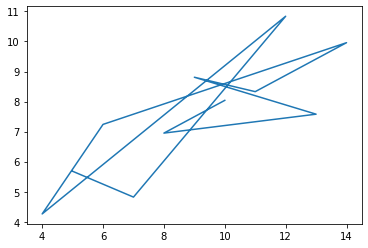

In [54]:
a_ser_of_x = dts1['x']
a_ser_of_y = dts1['y']

plt.plot( a_ser_of_x, a_ser_of_y )

We don't want lines to connect the dot

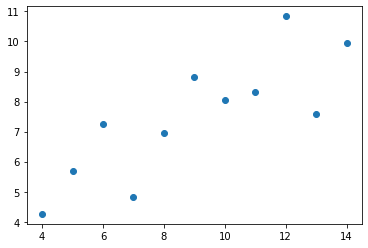

In [55]:
plt.plot( a_ser_of_x, a_ser_of_y, 'o')

Now, let's create a more complicated plot.

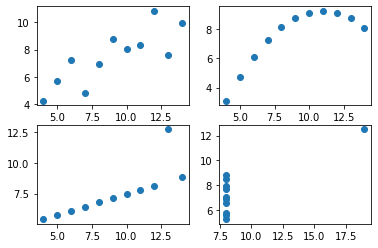

In [56]:
fig = plt.figure() # a blank canvas

axes1 = fig.add_subplot(2,2, 1) #two rows, two columns, #1
axes2 = fig.add_subplot(2,2, 2) #two rows, two columns, #2
axes3 = fig.add_subplot(2,2, 3) #two rows, two columns, #3
axes4 = fig.add_subplot(2,2, 4) #two rows, two columns, #4

axes1.plot( dts1['x'], dts1['y'], 'o')
axes2.plot( dts2['x'], dts2['y'], 'o')
axes3.plot( dts3['x'], dts3['y'], 'o')
axes4.plot( dts4['x'], dts4['y'], 'o')

Can you add the title to each plot ?

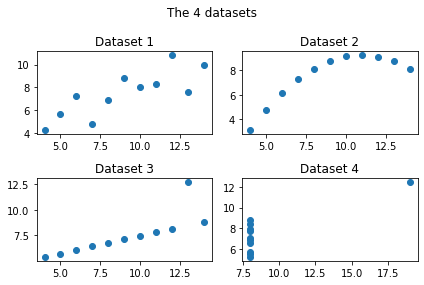

In [57]:
axes1.set_title("Dataset 1")
axes2.set_title("Dataset 2")
axes3.set_title("Dataset 3")
axes4.set_title("Dataset 4")

fig.suptitle("The 4 datasets")

fig.tight_layout() #put them close to each other

fig

### Let's filter only some (desired) data points from a dataframe
With the same thinking process, we need a set of boolean values (aka 'selected'). If we want dataset 'I' and the x value greater than 10. We can create it like this.

```selected = (anscombe['dataset']== 'I') & (anscombe['x']>10)```

```anscombe[selected]```

Let's put them together in one line. We also assign the result to a new dataframe.

In [58]:
dts1high = anscombe[ (anscombe['dataset']== 'I') & (anscombe['x']>10) ]
dts2high = anscombe[ (anscombe['dataset']== 'II') & (anscombe['x']>10) ]
dts3high = anscombe[ (anscombe['dataset']== 'III') & (anscombe['x']>10) ]
dts4high = anscombe[ (anscombe['dataset']== 'IV') & (anscombe['x']>10) ]

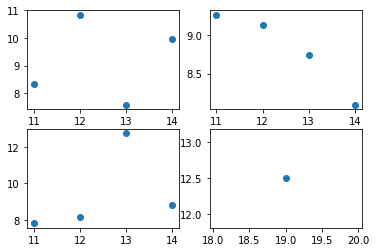

In [59]:
fig2 = plt.figure()

axes1 = fig2.add_subplot(2,2, 1) #two rows, two columns, #1
axes2 = fig2.add_subplot(2,2, 2) #two rows, two columns, #2
axes3 = fig2.add_subplot(2,2, 3) #two rows, two columns, #3
axes4 = fig2.add_subplot(2,2, 4) #two rows, two columns, #4

axes1.plot( dts1high['x'], dts1high['y'], 'o')
axes2.plot( dts2high['x'], dts2high['y'], 'o')
axes3.plot( dts3high['x'], dts3high['y'], 'o')
axes4.plot( dts4high['x'], dts4high['y'], 'o')

## Do it in seaborn !!!

## Univariate
* Line Plot
* Bar Plot
* Count Plot
* Histogram

## Bivariate
* Scatter Plot 
    * regplot
    * lmplot
* Joint Plot

## Multivariate
* Pair Plot

### Lineplot

In [60]:
# Load tips data
tips = sns.load_dataset("tips")
tips.head(3)

# The first thing is to try to under stand meaning of the values

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


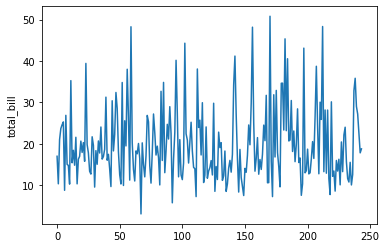

In [61]:
lineplt, ax = plt.subplots() # figure & axes

# calling for a line plot, feeding a series of x and tips as the data
ax = sns.lineplot(x=tips.index, y=tips['total_bill'])
plt.show()

### Barplot

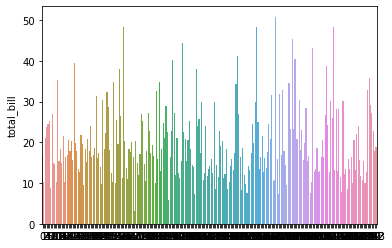

In [62]:
barplt, ax = plt.subplots()

# calling for a bar plot, feeding a series of x and total_bill as the data
ax = sns.barplot(x=tips.index, y=tips['total_bill'])
plt.show()

### Count Plot

In [63]:
#Just a quick review
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Count plot is very useful. It can count data in the column where the data is categorical. The plot will show frequency (aka: count) of each category.

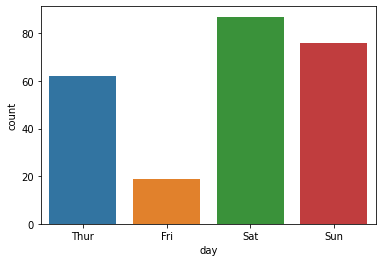

In [77]:
countplt, ax = plt.subplots()
# pass the column that we want to count, and the dataframe
ax = sns.countplot(x = tips['day']) 
plt.show()

### Histogram
Histogram is one of the most important plots. In statistics, we use it quite a lot. It shows us the distribution of our data. Later on this course, we will see that we use a histogram to evaluate our model that it is good or bad.

C:\Users\Sasha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


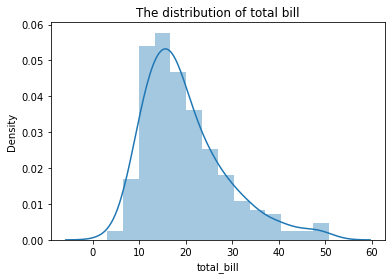

In [65]:
hist, ax = plt.subplots()

ax = sns.distplot(tips['total_bill']) #distribution
ax.set_title('The distribution of total bill')
plt.show()

### Let's make it more completed

C:\Users\Sasha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


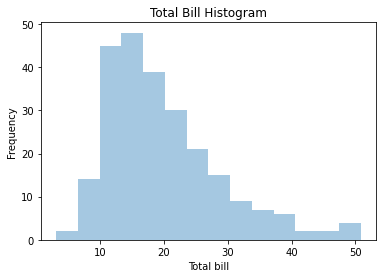

In [66]:
dstplt, ax = plt.subplots()
# The line is Kernel Density Estimation
ax = sns.distplot(tips['total_bill'], kde=False) 
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total bill')
ax.set_ylabel('Frequency')
plt.show()

## Bivariable
### Scatter Plot
When we have two aspects and they are numerical (ex: lat & long), scatter plot is a good way to show data. Many data scientists consider it is as the most useful tool to take a quick look into the data.

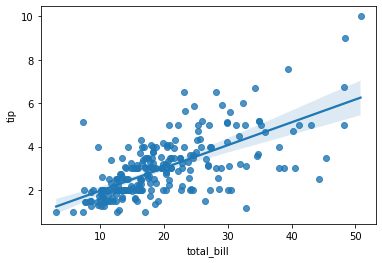

In [67]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip',data=tips) #regression
plt.show()

### Linear Model Plot (a powerup of regplot)
This is another way to do it. However, lmplot is more powerful. We can customize it and it support FacetGrid (multiple plots).

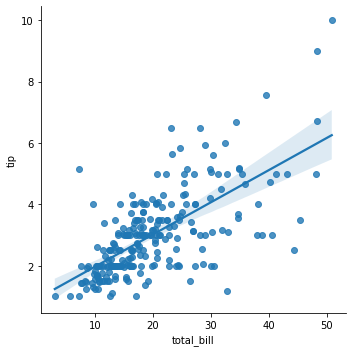

In [68]:
fig = sns.lmplot(x='total_bill',y='tip', data = tips)

### Joint Plot

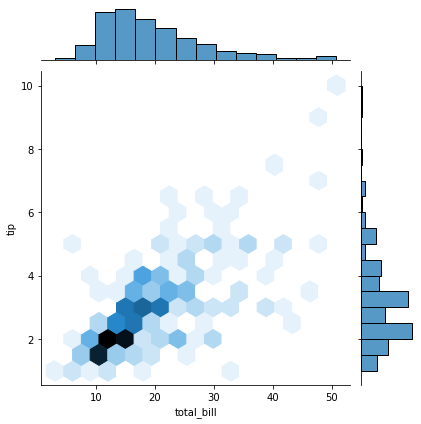

In [69]:
hexbin = sns.jointplot(x="total_bill", y='tip', data=tips, kind="hex")

### Violin Plot

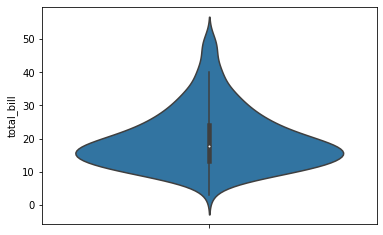

In [70]:
violin , ax = plt.subplots()
ax = sns.violinplot(y='total_bill',data=tips)

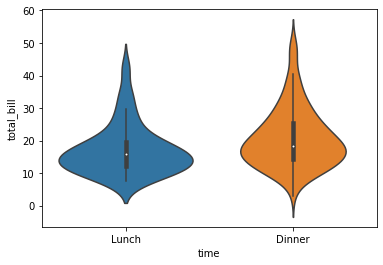

In [71]:
violin , ax = plt.subplots()
ax = sns.violinplot(x = 'time',y='total_bill',data=tips)

### Pairwire Relationships
Relationships of numerical data

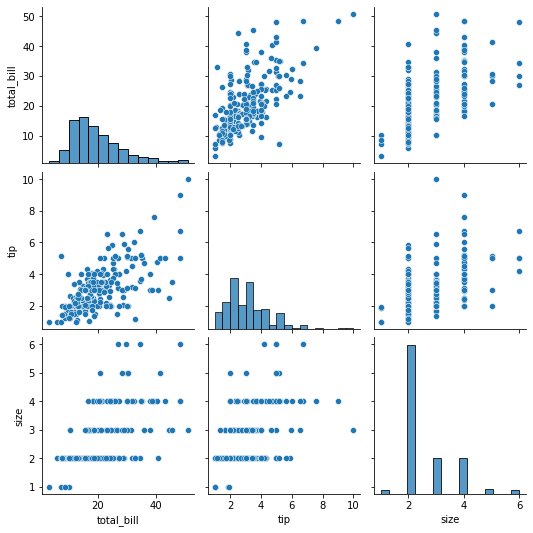

In [72]:
fig = sns.pairplot(tips)

## Multivariate
Since most of plots are 2D, therefore we choose x-axis and y-axis. (I intentionally avoid using the plural from of axis since it will be the same as the term we already use, axes.)

With x-axis & y-axis, we can handle bivariate easily. To have more aspect without introducing depth, we can use some others to differentiate value of the additional aspect.

### Color

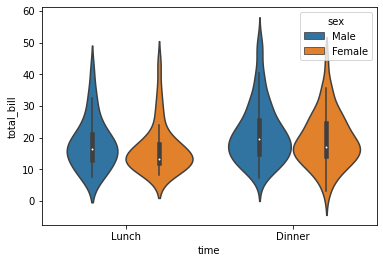

In [73]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',hue='sex',data=tips)

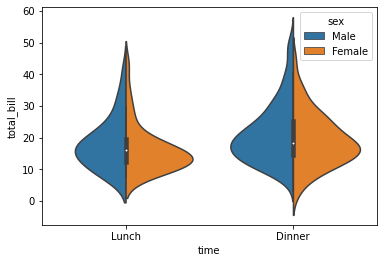

In [74]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill',hue='sex',split=True,data=tips) 
# Notice split=True

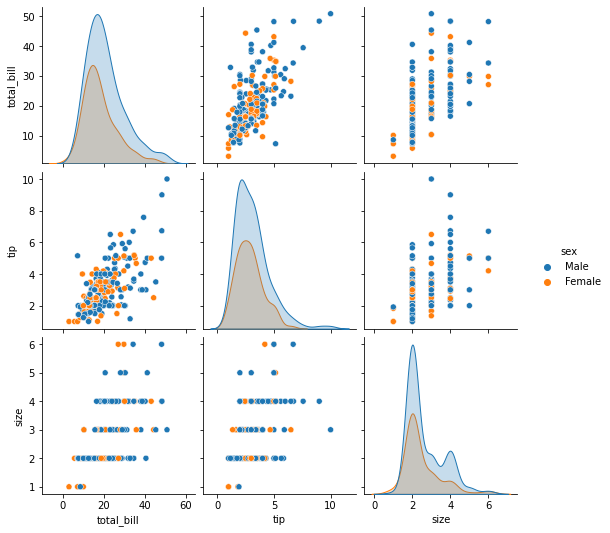

In [75]:
fig = sns.pairplot(tips, hue='sex')

### Size and Shape

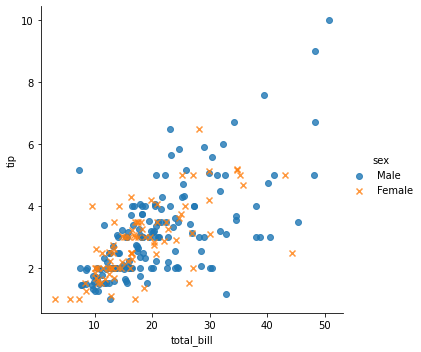

In [76]:
scatter = sns.lmplot(x='total_bill', y='tip',data=tips,fit_reg=False,hue='sex',markers=['o','x'])